In [83]:
import cv2
import  matplotlib.pyplot as plt

In [84]:
img_bgr = cv2.imread('tiger.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   ## convert BGR to RGB for displaying with matplotlib

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


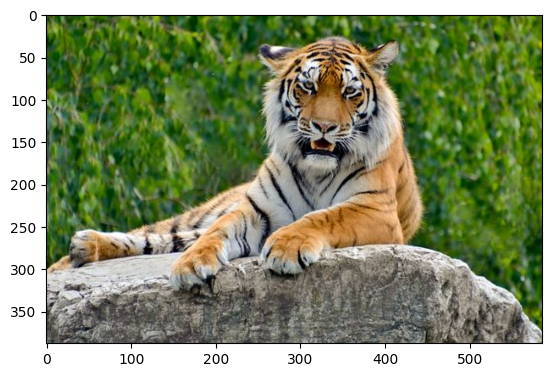

In [ ]:
plt.imshow(img)
plt.show()  # this is a valid way to display an image with matplotlib

In [86]:
#  pillow 
from PIL import Image
img1 = Image.open('tiger.jpg')
img1.show()
print(img.shape)
print(img.size)
print(img.dtype)

(388, 586, 3)
682104
uint8


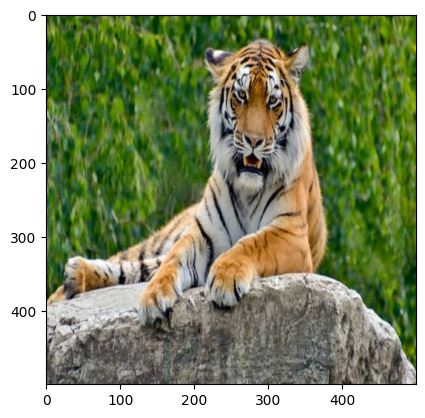

In [87]:
## scaling -- changes the size of an image either enlarging or reducing it
# scaled -- cv2.resize(img, (new_width, new_height))
scl_img=cv2.resize(img, (500, 500))  # example of scaling
plt.imshow(scl_img)

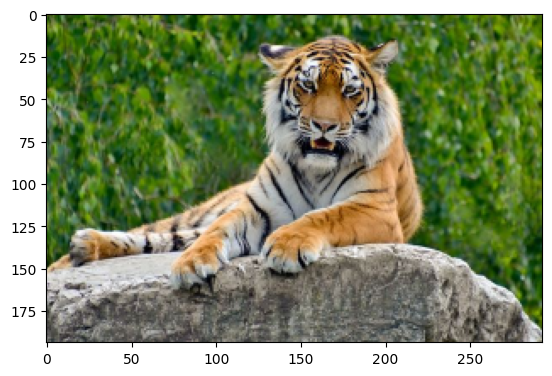

In [88]:
# another method of scaling
scl_img1 = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)  # scaling by a factor   #
#(0,0) is mean the image have no change in size, 
# fx , fy  -- scaling factor
#five tiems of origanl height and width
# ## 200 * 0.5 = 100
## 300 * 0.5 = 150  
plt.imshow(scl_img1)


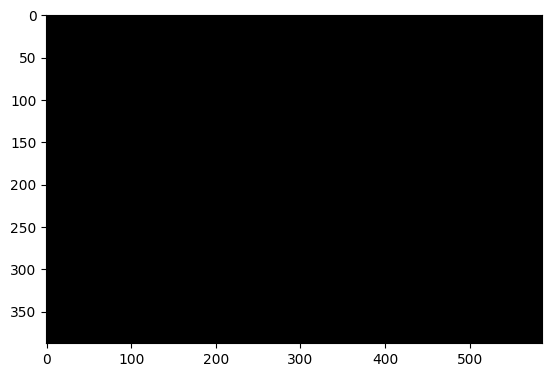

In [89]:
# translation -- moving the image in x and y direction
import numpy as np
rows , cols = img.shape[:2]
tx , ty = 1000,500 # translation factors
M = np.float32([[1, 0, tx], [0, 1, ty]])  # translation matrix
# 1= no change in x direction
# 0 = no change in y direction
translated_img = cv2.warpAffine(img, M, (cols, rows))  #
plt.imshow(translated_img)

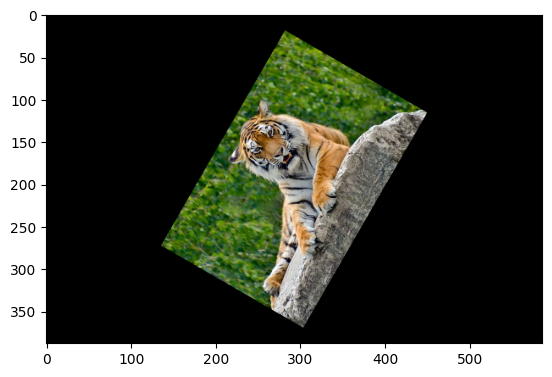

In [90]:
# rotation -- rotating the image by a certain angle
center= (cols // 2, rows // 2)  # center of the image
angle = 60  # angle of rotation
scale=0.5  # scaling factor
# scale = zoom in and zoom out
# 1== original size , <1 == zoom out, >1 == zoom in
M = cv2.getRotationMatrix2D(center, angle, scale)  # rotation matrix

rotated_img = cv2.warpAffine(img, M, (cols, rows))  # rotated image
plt.imshow(rotated_img)

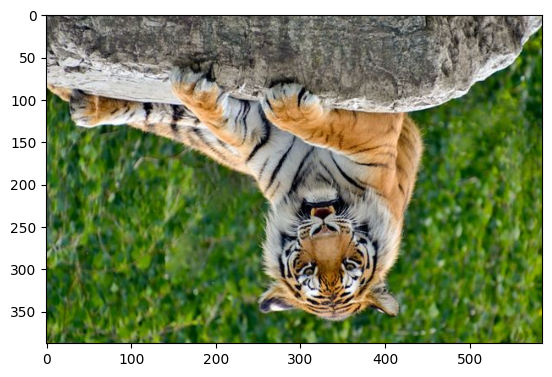

In [91]:
# flipping -- flipping the image horizontally or vertically
flipped_img = cv2.flip(img, 0)  # 1 for horizontal flip, 0 for vertical flip, -1 for both
plt.imshow(flipped_img)

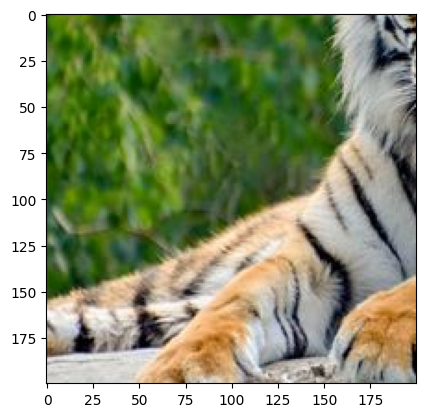

In [92]:
# cropping -- extracting a region of interest (ROI) from the image   % slice in array
# x, y, w, h = 100, 100, 200, 200 # x, y are the top-left corner coordinates, w is width, h is height
# cropped_img = img[y:y+h, x:x+w]  # cropping the image
cropped_img = img[100:300, 100:300]  # cropping the image
plt.imshow(cropped_img)

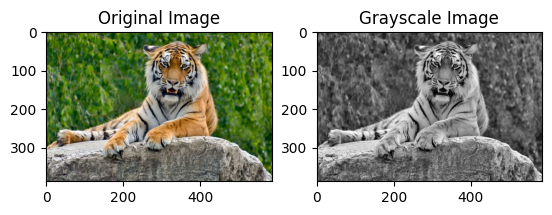

In [93]:
#  RGB image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # convert RGB to grayscale
plt.subplot(1, 2, 1)  # create a subplot with 1 row and 2 columns
plt.imshow(img)  # display original image   
plt.title('Original Image')  # title for the first subplot
plt.subplot(1, 2, 2)  # second subplot
plt.imshow(gray_img, cmap='gray')  # display grayscale image
plt.title('Grayscale Image')  # title for the second subplot
plt.show()  # show the plot

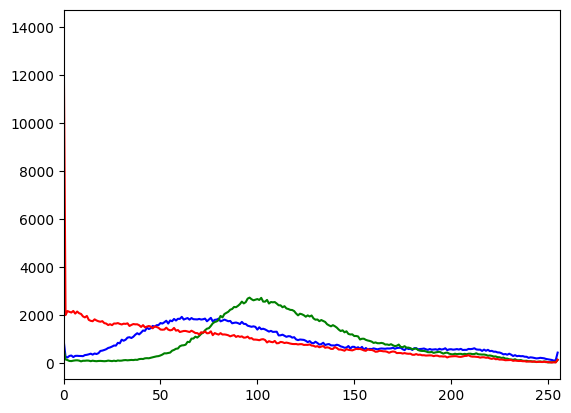

In [94]:
# histogram -- distribution of pixel intensities in an image
color=('blue', 'green', 'red')
for i , col in enumerate(color):
    # plt.subplot(1, 2, 1)  # create a subplot for the histogram
    # i= channel index (0 for blue, 1 for green, 2 for red)
    # col = color for the histogram
    # None = mask (if we want to apply a mask)
    # [256] = number of bins in the histogram
    # [0, 256] = range of pixel values    
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])  # calculate histogram for each color channel
    plt.plot(hist, color=col)  # plot histogram for each channel
plt.xlim([0, 256])  # set x-axis limits 
# plt.hist(gray_img.ravel(), bins=256, range=[0, 256])  # ravel() flattens the array
plt.show()


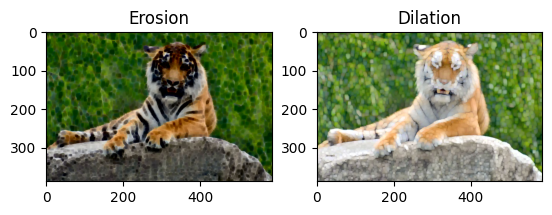

In [95]:
## erosion and dilation
# erosion -- removes pixels on object boundaries
# dilation -- adds pixels to object boundaries
kernel = np.ones((5, 5), np.uint8)  # kernel for morphological  
# operations
# np.ones((5, 5), np.uint8) creates a 5x5 kernel of ones (white pixels)
erosion_img = cv2.erode(img, kernel, iterations=1)  # erode the image
dilated_img = cv2.dilate(img, kernel, iterations=1)  # dilate the image
plt.subplot(1, 2, 1)  # create a subplot for erosion
plt.imshow(erosion_img)  # display eroded image
plt.title('Erosion')  # title for the erosion subplot
plt.subplot(1, 2, 2)  # create a subplot for dilation
plt.imshow(dilated_img)  # display dilated image
plt.title('Dilation')  # title for the dilation subplot
plt.show()  # show the plot
